# 🌺Lab 1

Klasifikasi Bunga Iris dengan Perceptron

## Langkah 1 - Import Library

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Langkah 2 - Load Data dan Visualisasi

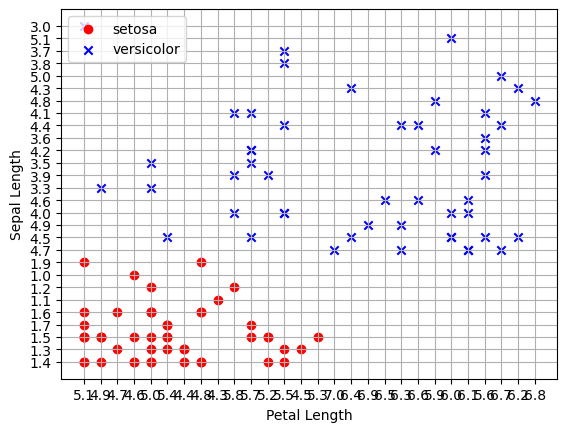

In [152]:
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/p13/dataset/Iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 1, 3 # Menggunakan SepalLengthCm (index 1) dan PetalLengthCm (index 3)
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length') # Label ini mungkin perlu disesuaikan jika a dan b berubah
plt.ylabel('Sepal Length') # Label ini mungkin perlu disesuaikan jika a dan b berubah
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Langkah 3 - Membuat Kelas Perceptron

In [153]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Langkah 4 - Pilih Data dan Encoding Label

In [154]:
y = df.iloc[1:101, 5].values # select 100 data samples, skipping header, using Species column
y = np.where(y == 'Iris-setosa', -1, 1) # change coding label
X = df.iloc[1:101, [1, 3]].values.astype(float) # slice data latih, skipping header, using SepalLengthCm and PetalLengthCm, convert to float

## Langkah 5 - Fitting Model

In [155]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## Langkah 6 - Visualisasi Nilai Error Per Epoch

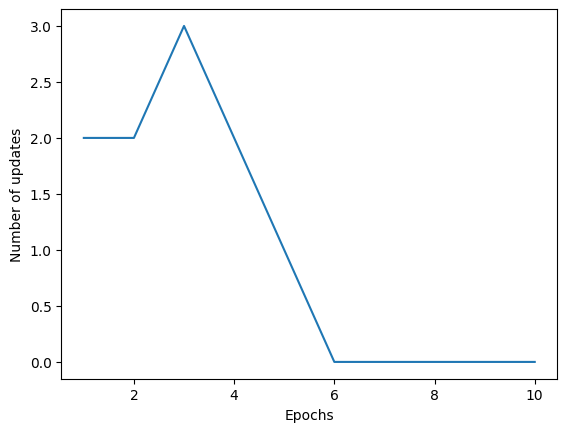

In [156]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Langkah 7 - Visualisasi Decision Boundary

In [157]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# 🌸Lab 2

Nilai Logika XOR dengan MLP

## Langkah 1 - Import Library

In [158]:
from sklearn.neural_network import MLPClassifier

## Langah 2 - Buat Data

In [159]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Langkah 3 - Fit Model

In [160]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

## Langkah 4 - Prediksi

In [161]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


#🌼Lab 3

Klasifikasi Churn Rate dengan ANN

## Pra Pengolahan Data

### Langkah 1 - Import Library

In [162]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Langkah 2 - Load Data

In [163]:
dataset = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/p13/dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [164]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Langkah 3 - Encoding Data Kategorikal

In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Langkah 5 - Split Data

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - Scaling Fitur

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

### Langkah 1 - Inisiasi Model ANN

In [169]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [170]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedu

In [171]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [172]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [173]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - Fitting Model

In [174]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8019 - loss: 0.5626
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4921
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4660
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4380
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7983 - loss: 0.4379
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.4505
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4173
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.4095
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8207 - loss: 0.4072
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8133 - loss: 0.4148
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8310 - loss: 0.4012
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Membuat Prediksi
Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

## Modelkan Data Baru dan Buat Prediksi

In [175]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[False]]


Apakah hasilnya False?

## Prediksi Dengan Data Testing

In [176]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Cek Akurasi dan Confusion Matrix

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1520   75]
 [ 200  205]]


0.8625

## 🌻Lab 4
Klasifikasi Siang dan Malang dengan ANN

## Langkah 1 - Import Library

In [178]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

## Langkah 2 - Load Dataset

In [179]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/MACHINE LEARNING/p13/dataset/images/training"
test_dir  = "/content/drive/MyDrive/MACHINE LEARNING/p13/dataset/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

## Langkah 2 - Pra Pengolahan

In [180]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

## Langkah 3 - Ekstraksi Fitur

In [181]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

## Langkah 4 - Standardisasi Fitur

In [182]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

## Langkah 5 - Buat Data Latih dan Validasi

In [183]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

## Langkah 6 - Buat Model ANN

In [184]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

## Langkah 7 - Latih Model

In [185]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7125 - loss: 0.6895 - val_accuracy: 0.9583 - val_loss: 0.5786
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9900 - loss: 0.0488 - val_accuracy: 0.9583 - val_loss: 0.7547
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9375 - val_loss: 1.0077
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9883 - loss: 0.0569 - val_accuracy: 0.9583 - val_loss: 0.8538
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 2.5275e-05 - val_accuracy: 0.9583 - val_loss: 0.8493
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 1.0000 - loss: 3.5623e-05 - val_accuracy: 0.9583 - val_loss: 0.8472
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 1.0000 - loss: 9.0181e-05 - val_accuracy: 0.9583 - val_loss: 0.8492
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 3.1889e-05 - val_accuracy: 0.9583 - v

## Langkah 8 - Evaluasi Model dengan Data Test

In [186]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9336 - loss: 1.3989
Akurasi Test: 0.9375


## Langkah 9 - Buat Laporan Performansi Model

In [187]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        80
           1       0.95      0.93      0.94        80

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160

[[76  4]
 [ 6 74]]


## Langkah 10 - Visualisasi Proses Training

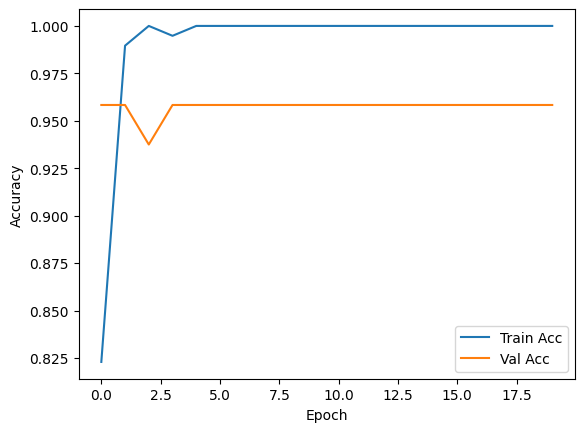

In [188]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Langkah 11 - Simpan Model

In [189]:
model.save('day_night_classifier_model.h5')

🌹
# Tugas Lab
Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,

Metode pra pengolahan

Pemilihan fitur

Arsitektur ANN

Fungsi Aktivasi

ANN diimplementasikan dengan menggunakan tensorflow.

## Langkah 1 - Import Library

In [190]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Langkah 2 - Memuat dan Mengeksplorasi Data

In [191]:
# Memuat dataset MNIST dari TensorFlow Keras
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Ukuran data training (gambar): {x_train.shape}")
print(f"Ukuran data training (label): {y_train.shape}")
print(f"Ukuran data testing (gambar): {x_test.shape}")
print(f"Ukuran data testing (label): {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Ukuran data training (gambar): (60000, 28, 28)
Ukuran data training (label): (60000,)
Ukuran data testing (gambar): (10000, 28, 28)
Ukuran data testing (label): (10000,)


## Langkah 3 - Pra-pengolahan Data (Normalisasi dan Flattening)

In [192]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"Ukuran data training setelah flatten: {x_train_flat.shape}")
print(f"Contoh label: {y_train[0]}")
print(f"Contoh data piksel (setelah normalisasi): {x_train[0][10, 10:15]}")

Ukuran data training setelah flatten: (60000, 784)
Contoh label: 5
Contoh data piksel (setelah normalisasi): [0.00392157 0.60392157 0.99215686 0.35294118 0.        ]


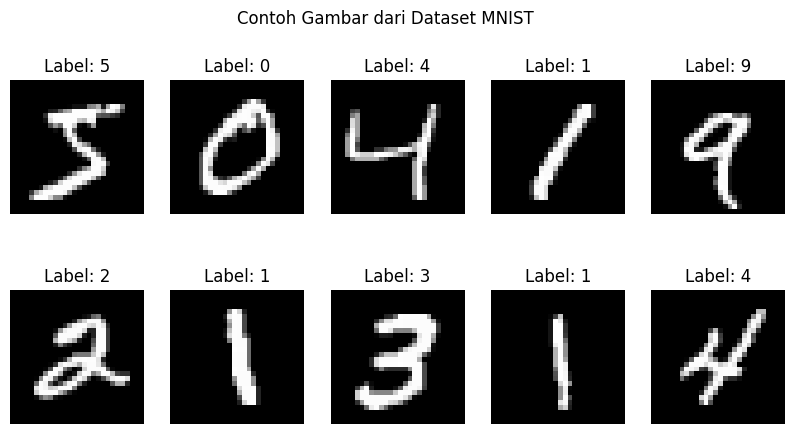

In [193]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Contoh Gambar dari Dataset MNIST")
plt.show()

## Langkah 4 - Membangun Model ANN

In [194]:
model_mnist = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Langkah 5 - Melatih Model

In [195]:
history_mnist = model_mnist.fit(x_train_flat, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8022 - loss: 0.6404 - val_accuracy: 0.9520 - val_loss: 0.1599
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9409 - loss: 0.1868 - val_accuracy: 0.9653 - val_loss: 0.1120
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9602 - loss: 0.1326 - val_accuracy: 0.9660 - val_loss: 0.1077
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9642 - loss: 0.1150 - val_accuracy: 0.9713 - val_loss: 0.0947
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9705 - loss: 0.0959 - val_accuracy: 0.9719 - val_loss: 0.0968
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9735 - loss: 0.0864 - val_accuracy: 0.9748 - val_loss: 0.0831
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0758 - val_accuracy: 0.9746 - val_loss: 0.0874
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9777 - loss: 0.0699 - 

## Langkah 6 - Evaluasi Model dengan Data Test

In [196]:
test_loss, test_acc = model_mnist.evaluate(x_test_flat, y_test, verbose=2)
print(f'\nAkurasi pada data test: {test_acc:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.9771 - loss: 0.0859

Akurasi pada data test: 0.9771


## Langkah 7 - Visualisasi Proses Training

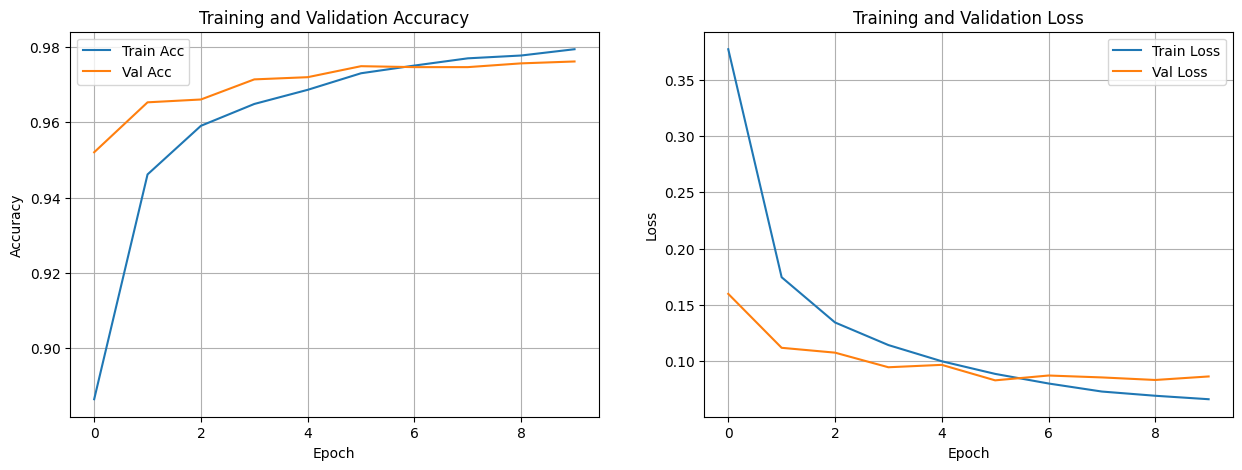

In [197]:
history_df = pd.DataFrame(history_mnist.history)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history_df['accuracy'], label='Train Acc')
ax[0].plot(history_df['val_accuracy'], label='Val Acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history_df['loss'], label='Train Loss')
ax[1].plot(history_df['val_loss'], label='Val Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].grid(True)

plt.show()

## Langkah 8 - Laporan Performansi Model dan Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.94      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:


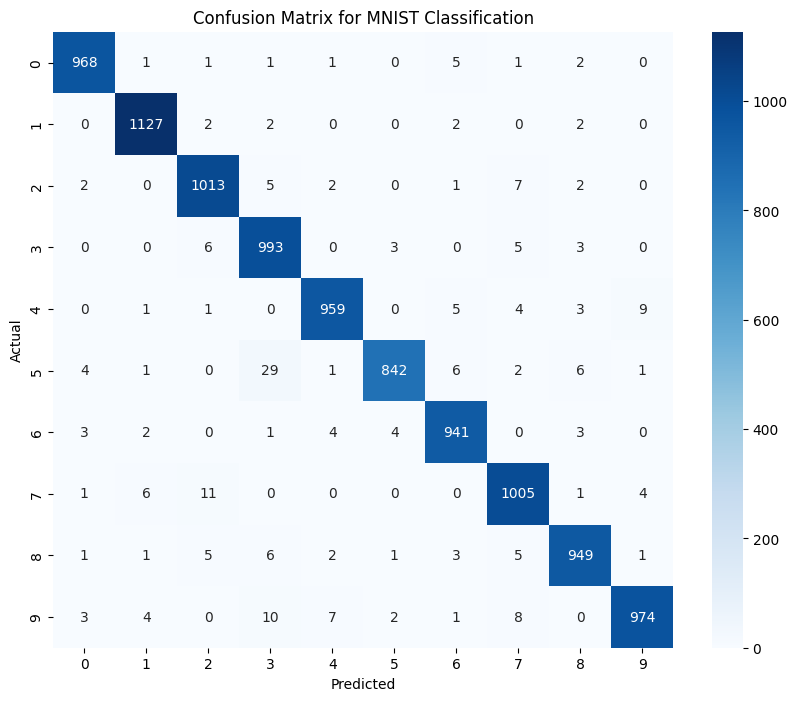

In [198]:
y_pred_prob = model_mnist.predict(x_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1) # Mengambil kelas dengan probabilitas tertinggi

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()